In [4]:
import sys
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('datasets/Student_Feedback_Surveys-Superview.csv')

In [5]:
df.head()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right


In [6]:
df.describe()

,ID
count,1453.000000
mean,759.235375
std,430.911349
min,8.000000
25%,387.000000
50%,764.000000
75%,1132.000000
max,1499.000000


In [143]:
df = df.dropna()

## What percentage of students were in each track?

In [146]:
# What percentage of overall attendees took each track?
print("Attendance of each track, in percentage of overall attendees:")
round((df['Track'].value_counts()/df['Track'].value_counts().sum()) * 100, 3)

Attendance of each track, in percentage of overall attendees:


Apps               61.949
Apps, Explorer     15.932
Games              14.794
VR                  4.267
Games, Explorer     3.058
Name: Track, dtype: float64

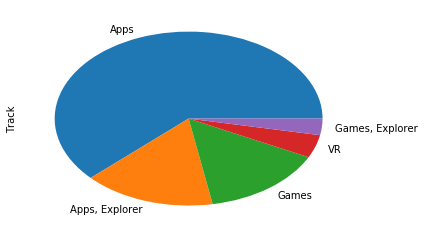

In [147]:
df['Track'].value_counts().plot.pie()
plt.show()

## What was the overall net promoter score and what track had the highest net promoter score?

In [10]:
# create new dataframes, each representing either promoter, passive, or detractors.
num_of_total_responses = len(df)
promoters_df = df[pd.to_numeric(df['Rating (Num)']) >= 9]
passives_df = df[(pd.to_numeric(df['Rating (Num)']) >= 7) & (pd.to_numeric(df['Rating (Num)']) <= 8)]
detractors_df = df[pd.to_numeric(df['Rating (Num)']) < 7]

assert num_of_total_responses == (len(promoters_df) + len(passives_df) + len(detractors_df))

In [11]:
print("Promoter: " + str(len(promoters_df)))
print("Passive: " + str(len(passives_df)))
print("Detractor: " + str(len(detractors_df)))

Promoter: 739
Passive: 554
Detractor: 113


In [12]:
nps = round((len(promoters_df) - len(detractors_df))/(len(promoters_df) + len(passives_df) + len(detractors_df)) * 100, 3)
print("This gives us an overall NPS of: " + str(nps))

This gives us an overall NPS of: 44.523


In [13]:
# Which track has the highest NPS?
def find_track_nps(track):
    temp_df = df[df['Track'] == track]
    
    track_promoters = temp_df[pd.to_numeric(df['Rating (Num)']) >= 9]
    track_passives = temp_df[(pd.to_numeric(df['Rating (Num)']) >= 7) & (pd.to_numeric(df['Rating (Num)']) <= 8)]
    track_detractors = temp_df[pd.to_numeric(df['Rating (Num)']) < 7]
    
    nps = (len(track_promoters) - len(track_detractors))/(len(track_promoters) + len(track_passives) + len(track_detractors)) * 100
    return nps

In [14]:
nps_results = dict()
for track in df["Track"].unique():
    nps_results[str(track)] = round(find_track_nps(track), 3)
#     print(str(track) + " NPS: " + str(round(find_track_nps(track), 3)))
nps_df = pd.DataFrame([nps_results])
nps_df['Average'] = [44.523]
nps_df

,Apps,"Apps, Explorer",Games,"Games, Explorer",VR,Average
0,41.332,29.911,59.615,72.093,73.333,44.523


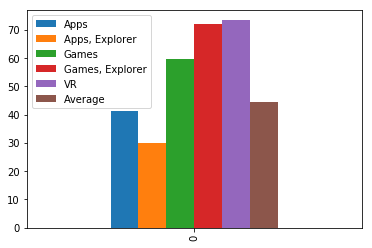

In [15]:
nps_df.plot.bar()
plt.show()

### NPS conclusion:
Using [this](https://www.retently.com/blog/good-net-promoter-score/) as a score reference, the only track that had what is to be considered average was Apps, Explorer. The rest of the track's NPS scores could be considered good or excellent! The average NPS for all the tracks was 44.5, which is above average. The track with the highest NPS score was VR with a score of 73.33.

## How does location affect NPS score?

In [61]:
df['Location'].value_counts()

San Francisco    360
New York City    330
Santa Clara      201
Los Angeles      106
Beijing           78
Chicago           70
Tokyo             65
Redwood City      58
Washington DC     47
Oakland           47
Atlanta           33
Hong Kong         11
Name: Location, dtype: int64

In [62]:
def find_location_nps(location):
    temp_df = df[df['Location'] == location]
    
    location_promoters = temp_df[pd.to_numeric(df['Rating (Num)']) >= 9]
    location_passives = temp_df[(pd.to_numeric(df['Rating (Num)']) >= 7) & (pd.to_numeric(df['Rating (Num)']) <= 8)]
    location_detractors = temp_df[pd.to_numeric(df['Rating (Num)']) < 7]
    
    nps = (len(location_promoters) - len(location_detractors))/(len(location_promoters) + len(location_passives) + len(location_detractors)) * 100
    return nps

In [70]:
nps_location_results = dict()
for location in df["Location"].unique():
    nps_location_results[str(location)] = round(find_location_nps(location), 3)
nps_location_df = pd.DataFrame([nps_location_results])
nps_location_df['Average'] = [44.523]
nps_location_df

,Atlanta,Beijing,Chicago,Hong Kong,Los Angeles,New York City,Oakland,Redwood City,San Francisco,Santa Clara,Tokyo,Washington DC,Average
0,72.727,67.949,47.143,-18.182,59.434,37.576,53.191,43.103,45.278,39.801,36.923,29.787,44.523


### Location NPS conclusion:
As shown above, the NPS of the locations ranges from -18.182 for Hong Kong to 72.727 for Atlanta. Again, using [this](https://www.retently.com/blog/good-net-promoter-score/), Most of the cities are in roughly the average range with Hong Kong being below average and Altanta, Beijing, Chicago, Oakland, Redwood City, and San Franncisco range frmo jsut above average to well above average.

## Does NPS improve week by week?

In [105]:
def find_week_nps(week):
    temp_df = df[df['Week'] == week]
    
    week_promoters = temp_df[pd.to_numeric(df['Rating (Num)']) >= 9]
    week_passives = temp_df[(pd.to_numeric(df['Rating (Num)']) >= 7) & (pd.to_numeric(df['Rating (Num)']) <= 8)]
    week_detractors = temp_df[pd.to_numeric(df['Rating (Num)']) < 7]
    
    nps = (len(week_promoters) - len(week_detractors))/(len(week_promoters) + len(week_passives) + len(week_detractors)) * 100
    return nps

In [136]:
nps_week_results = dict()
for week in df["Week"].unique():
    nps_week_results[str(week)] = round(find_week_nps(week), 3)
nps_week_df = pd.DataFrame([nps_week_results])
nps_week_df

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8
0,34.783,42.912,48.498,41.799,46.023,47.552,58.824,77.778


In [137]:
nps_week_scores = pd.melt(nps_week_df)
nps_week_scores = nps_week_scores.rename(columns = {'variable':'Week','value':'Rating (Num)'})
nps_week_scores

,Week,Rating (Num)
0,Week 1,34.783
1,Week 2,42.912
2,Week 3,48.498
3,Week 4,41.799
4,Week 5,46.023
5,Week 6,47.552
6,Week 7,58.824
7,Week 8,77.778


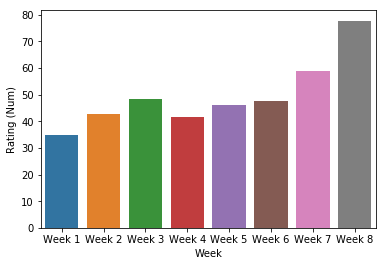

In [141]:
# nps_week_df.plot.scatter(x=list(nps_week_results.values(), y=nps_week_results.keys())
sns.barplot(x='Week', y='Rating (Num)', data=nps_week_scores)
plt.show()

### As seen from the graph above, the NPS generally increases as the weeks progress.

## Is NPS related to the rated pace of each track?

In [198]:
def find_pace_nps(pace):
    temp_df = df[df['Schedule Pacing'] == pace]
    
    pace_promoters = temp_df[pd.to_numeric(df['Rating (Num)']) >= 9]
    pace_passives = temp_df[(pd.to_numeric(df['Rating (Num)']) >= 7) & (pd.to_numeric(df['Rating (Num)']) <= 8)]
    pace_detractors = temp_df[pd.to_numeric(df['Rating (Num)']) < 7]
    
    nps = (len(pace_promoters) - len(pace_detractors))/(len(pace_promoters) + len(pace_passives) + len(pace_detractors)) * 100
    return nps

In [199]:
nps_pace_results = dict()
for pace in df['Schedule Pacing'].unique():
    nps_pace_results[str(pace)] = round(find_pace_nps(pace), 3)
nps_pace_df = pd.DataFrame([nps_pace_results])
nps_pace_df

,A little too fast,A little too slow,Just right,Way too fast,Way too slow
0,35.145,24.742,50.743,-28.571,-33.333


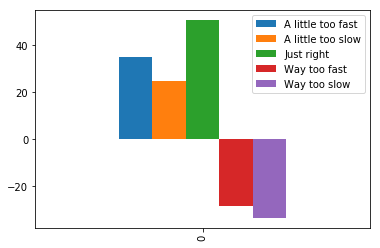

In [202]:
nps_pace_df.plot.bar()
plt.show()

### This graph shows that as long as students didn't think the pace was way too fast or slow, the courses would receive a positive NPS